In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
colors = ["#0066CC", "#C62D42", "#33CC99", "#652DC1", "#9E5B40", "#E77200"]
% matplotlib inline 

In [87]:
df_week1 = pd.read_csv("data/fantasy_wk1.csv", index_col=0)
df_week2 = pd.read_csv("data/fantasy_wk2.csv", index_col=0)
df_week3 = pd.read_csv("data/fantasy_wk3.csv", index_col=0)

#df_week1 = df_week1.replace(np.nan, 0)
#df_week2 = df_week2.replace(np.nan, 0)

print(df_week1.head())
print(df_week1.shape)
print(df_week2.head())
print(df_week2.shape)
print(df_week3.head())
print(df_week3.shape)

              projected  actual position
names                                   
49ers D/ST          5.7    14.0      DST
A.J. Green         10.1    24.0       WR
AJ Derby            NaN     0.0       TE
AJ McCarron         NaN     0.0       QB
Aaron Murray        NaN     0.0       QB
(658, 3)
              projected  actual position
names                                   
49ers D/ST          3.9     0.0      DST
A.J. Green         12.6     3.0       WR
AJ Derby            NaN     0.0       TE
AJ McCarron         NaN     0.0       QB
Aaron Murray        NaN     0.0       QB
(655, 3)
              projected  actual position
names                                   
49ers D/ST          4.7     0.0      DST
A.J. Green         10.0     7.0       WR
AJ Derby            NaN     0.0       TE
AJ McCarron         NaN     0.0       QB
Aaron Murray        NaN     0.0       QB
(656, 3)


In [88]:
df_week1 = df_week1.dropna()
df_week2 = df_week2.dropna()
df_week3 = df_week3.dropna()

#df_week1 = df_week1[pd.notnull(df_week1['position'])]
#df_week2 = df_week2[pd.notnull(df_week2['position'])]
#df_week3 = df_week3[pd.notnull(df_week3['position'])]
#df_week1 = df_week1.replace(np.nan, 0)
#df_week2 = df_week2.replace(np.nan, 0)
#df_week3 = df_week3.replace(np.nan, 0)

print(df_week1.shape)
print(df_week2.shape)
print(df_week3.shape)

(267, 3)
(270, 3)
(269, 3)


In [89]:
print(df_week1.describe())
print(df_week2.describe())
print(df_week3.describe())

        projected      actual
count  267.000000  267.000000
mean     7.867041    7.977528
std      3.764421    6.788387
min      2.700000   -8.000000
25%      5.450000    3.000000
50%      7.000000    7.000000
75%      9.350000   11.000000
max     19.900000   35.000000
        projected      actual
count  270.000000  270.000000
mean     7.795926    7.988889
std      3.652348    6.556295
min      2.400000   -6.000000
25%      5.200000    3.000000
50%      7.250000    7.000000
75%      9.175000   11.750000
max     21.600000   29.000000
        projected      actual
count  269.000000  269.000000
mean     7.988848    7.947955
std      3.833954    7.185514
min      2.800000   -4.000000
25%      5.400000    3.000000
50%      7.300000    6.000000
75%      9.700000   11.000000
max     19.800000   32.000000


In [90]:
dfs = [df_week1, df_week2, df_week3]
for i,df in enumerate(dfs, start=1):
    proj_sum = df.projected.sum()
    actual_sum = df.actual.sum()
    error = abs((proj_sum - actual_sum) / actual_sum)
    print("Week {} error: {:.4}".format(i, error))



Week 1 error: 0.01385
Week 2 error: 0.02415
Week 3 error: 0.005145


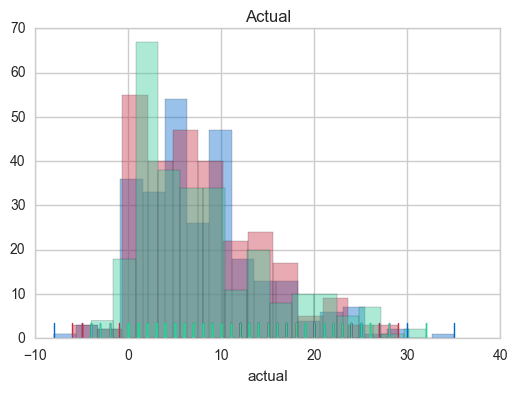

In [91]:
#plt.subplot(2, 1, 1)

for df,color in zip(dfs,colors):
    sns.distplot(df.actual, kde=False, rug=True, color=color)
plt.title("Actual")

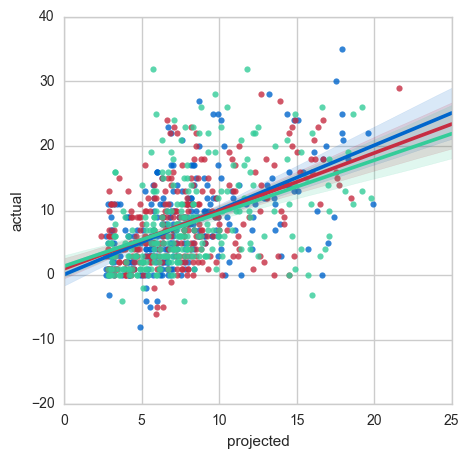

In [92]:
plt.figure(figsize=(5,5))
for df,color in zip(dfs, colors):
    sns.regplot(x=df.projected, y=df.actual, color=color)

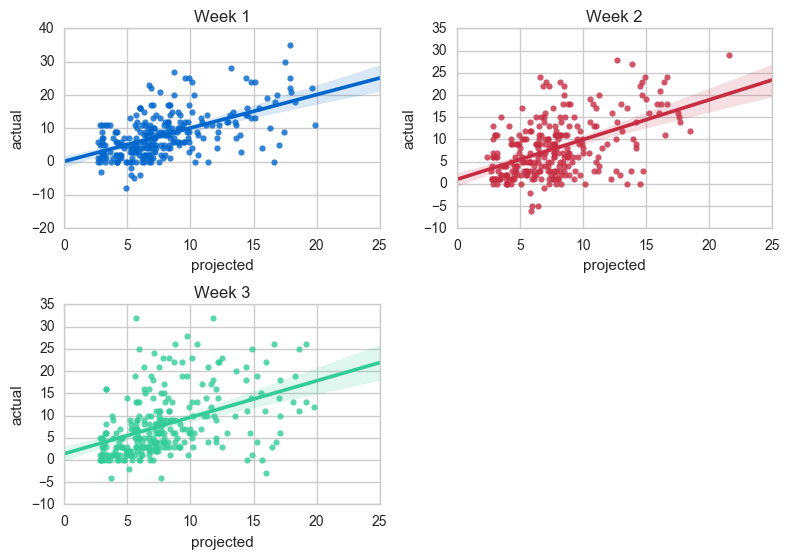

In [93]:
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)

plt.title("Week 1")
sns.regplot(x=df_week1.projected, y=df_week1.actual, color=colors[0])
plt.subplot(3,2,2)
plt.title("Week 2")
sns.regplot(x=df_week2.projected, y=df_week2.actual, color=colors[1])
plt.subplot(3,2,3)
plt.title("Week 3")
sns.regplot(x=df_week3.projected, y=df_week3.actual, color=colors[2])

plt.tight_layout()

In [109]:
#positions ["QB", "RB", "WR", "TE", "DST", "K"]
proj_qb = proj_rb = proj_wr = proj_te = proj_dst= proj_k = 0
actual_qb = actual_rb = actual_wr = actual_te = actual_dst = actual_k = 0
for df in dfs:
    df_qb        = df[(df.position == "QB")]
    proj_qb     +=  df_qb.projected.sum()
    actual_qb   +=  df_qb.actual.sum()
    df_rb        = df[(df.position == "RB")]
    proj_rb     +=  df_rb.projected.sum()
    actual_rb   +=  df_rb.actual.sum()
    df_wr        = df[(df.position == "WR")]
    proj_wr     +=  df_wr.projected.sum()
    actual_wr   +=  df_wr.actual.sum()
    df_te        = df[(df.position == "TE")]
    proj_te     +=  df_te.projected.sum()
    actual_te   +=  df_te.actual.sum()
    df_dst       = df[(df.position == "DST")]
    proj_dst    +=  df_dst.projected.sum()
    actual_dst  +=  df_dst.actual.sum()
    df_k         = df[(df.position == "K")]
    proj_k      +=  df_k.projected.sum()
    actual_k    +=  df_k.actual.sum()


#print(proj_qb)
print("QB error: {:.4}".format(abs(proj_qb - actual_qb)/actual_qb))
print("RB error: {:.4}".format(abs(proj_rb - actual_rb)/actual_rb))
print("WR error: {:.4}".format(abs(proj_wr - actual_wr)/actual_wr))
print("TE error: {:.4}".format(abs(proj_te - actual_te)/actual_te))
print("DST error: {:.4}".format(abs(proj_dst - actual_dst)/actual_dst))
print("K error: {:.4}".format(abs(proj_k - actual_k)/actual_k))

QB error: 0.4375
RB error: 0.03007
WR error: 0.06608
TE error: 0.1792
DST error: 0.08116
K error: 0.02487


In [119]:
qb_diff = [(p - a)**2 for p, a in zip(df_qb.projected, df_qb.actual)]
rb_diff = [(p - a)**2 for p, a in zip(df_rb.projected, df_rb.actual)]
wr_diff = [(p - a)**2 for p, a in zip(df_wr.projected, df_wr.actual)]
te_diff = [(p - a)**2 for p, a in zip(df_te.projected, df_te.actual)]
dst_diff = [(p - a)**2 for p, a in zip(df_dst.projected, df_dst.actual)]
kicker_diff = [(p - a)**2 for p, a in zip(df_k.projected, df_k.actual)]

print("QB std error: ", np.sqrt(np.sum(qb_diff)/df_qb.size))
print("RB std error: ", np.sqrt(np.sum(rb_diff)/df_rb.size))
print("WR std error: ", np.sqrt(np.sum(wr_diff)/df_wr.size))
print("TE std error: ", np.sqrt(np.sum(te_diff)/df_te.size))
print("DST std error: ", np.sqrt(np.sum(dst_diff)/df_dst.size))
print("Kicker std error: ", np.sqrt(np.sum(kicker_diff)/df_k.size))

QB std error:  4.58871922066
RB std error:  3.72199118629
WR std error:  3.40125183664
TE std error:  3.74955889662
DST std error:  4.72758967833
Kicker std error:  2.34274144967


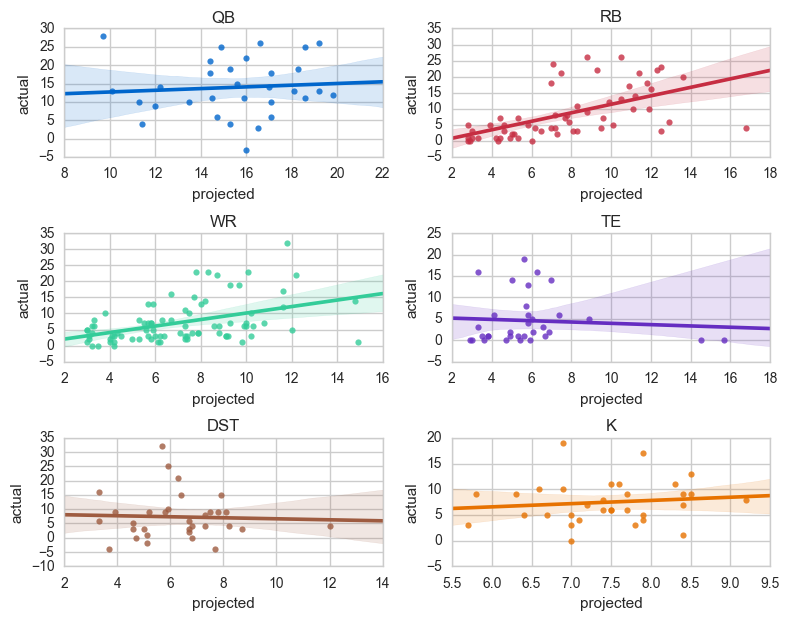

In [130]:
df_pos = [df_qb, df_rb, df_wr, df_te, df_dst, df_k]

plt.figure(figsize=(8,12))
plt.subplot(6,2,1)
plt.title("QB")
sns.regplot(x=df_pos[0].projected, y=df_pos[0].actual, color=colors[0])
plt.subplot(6,2,2)
plt.title("RB")
sns.regplot(x=df_pos[1].projected, y=df_pos[1].actual, color=colors[1])
plt.subplot(6,2,3)
plt.title("WR")
sns.regplot(x=df_pos[2].projected, y=df_pos[2].actual, color=colors[2])
plt.subplot(6,2,4)
plt.title("TE")
sns.regplot(x=df_pos[3].projected, y=df_pos[3].actual, color=colors[3])
plt.subplot(6,2,5)
plt.title("DST")
sns.regplot(x=df_pos[4].projected, y=df_pos[4].actual, color=colors[4])
plt.subplot(6,2,6)
plt.title("K")
sns.regplot(x=df_pos[5].projected, y=df_pos[5].actual, color=colors[5])

plt.tight_layout()